# Problem definition
Building a correlation matrix with data from the IMDB. 

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use("ggplot")
# matplotlib.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

pd.options.mode.chained_assignment = None

# Exploring and cleaning the data

In [95]:
# Import data
df = pd.read_csv(r'C:\Users\Vincent\datasets\movies.csv')

In [96]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [97]:
# Are there duplicates?
df.duplicated().sum()

0

In [98]:
# General info on the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [99]:
# We can already see that there is missing data.
# Also, "released" is a date but has added text, so istype=object

In [100]:
# Deeper look into missing data
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [101]:
df.sort_values(by=["released"]).tail(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [102]:
# Deeper look into "released" column
df["released"]

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [103]:
# We'll separate the data into release_date, release_year, release_month, release_day, release_country 
df[["release_month_day", "release_year_country"]] = df["released"].str.split(", ",expand=True)
df[["release_month", "release_day", "temp1", "temp2"]] = df["release_month_day"].str.split(" ", expand=True)
df[["release_year", "release_country"]] = df["release_year_country"].str.split(" \(", expand=True)
df["release_country"] = df["release_country"].str[:-1]
df.drop(["release_month_day", "release_year_country", "temp1", "temp2"],axis=1,inplace=True)

In [104]:
df.head().T

,0,1,2,3,4
name,The Shining,The Blue Lagoon,Star Wars: Episode V - The Empire Strikes Back,Airplane!,Caddyshack
rating,R,R,PG,PG,R
genre,Drama,Adventure,Action,Comedy,Comedy
year,1980,1980,1980,1980,1980
released,"June 13, 1980 (United States)","July 2, 1980 (United States)","June 20, 1980 (United States)","July 2, 1980 (United States)","July 25, 1980 (United States)"
score,8.4,5.8,8.7,7.7,7.3
votes,927000.0,65000.0,1200000.0,221000.0,108000.0
director,Stanley Kubrick,Randal Kleiser,Irvin Kershner,Jim Abrahams,Harold Ramis
writer,Stephen King,Henry De Vere Stacpoole,Leigh Brackett,Jim Abrahams,Brian Doyle-Murray
star,Jack Nicholson,Brooke Shields,Mark Hamill,Robert Hays,Chevy Chase


In [105]:
# We can now unify the columns release_year and year
df["release_year"].isna().sum()

59

In [106]:
df["year"].isna().sum()

0

In [107]:
# We will consider "release_year" as being more truthfull, but will fill in the missing values with values from "year" when necesary.
df["release_year"] = df["release_year"].fillna(df["year"])
df["release_year"].isna().sum()

0

In [108]:
# Turning Rating and Genre into categories, and simplifying rating values
df[["rating","genre"]] = df[["rating","genre"]].astype("category")
df.rating.cat.categories

Index(['Approved', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14',
       'TV-MA', 'TV-PG', 'Unrated', 'X'],
      dtype='object')

In [109]:
df = df.replace({"rating":{"Unrated":"Not Rated"}})
df.rating.cat.categories

Index(['Approved', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14',
       'TV-MA', 'TV-PG', 'X'],
      dtype='object')

In [110]:
# We can now delete the columns we do not need:
df = df.drop(columns=["year","released"],axis=1)
df.head().T

,0,1,2,3,4
name,The Shining,The Blue Lagoon,Star Wars: Episode V - The Empire Strikes Back,Airplane!,Caddyshack
rating,R,R,PG,PG,R
genre,Drama,Adventure,Action,Comedy,Comedy
score,8.4,5.8,8.7,7.7,7.3
votes,927000.0,65000.0,1200000.0,221000.0,108000.0
director,Stanley Kubrick,Randal Kleiser,Irvin Kershner,Jim Abrahams,Harold Ramis
writer,Stephen King,Henry De Vere Stacpoole,Leigh Brackett,Jim Abrahams,Brian Doyle-Murray
star,Jack Nicholson,Brooke Shields,Mark Hamill,Robert Hays,Chevy Chase
country,United Kingdom,United States,United States,United States,United States
budget,19000000.0,4500000.0,18000000.0,3500000.0,6000000.0


# Checking Correlation between parameters

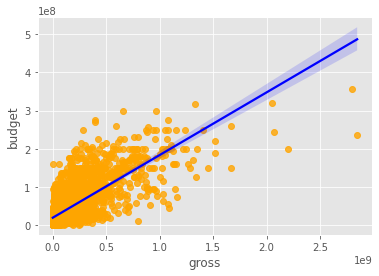

In [111]:
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"orange"}, line_kws={"color":"blue"});

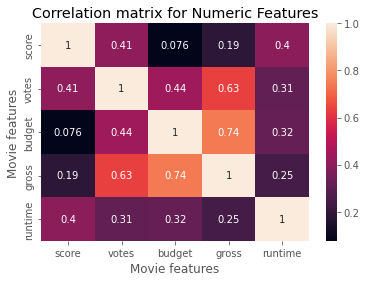

In [112]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

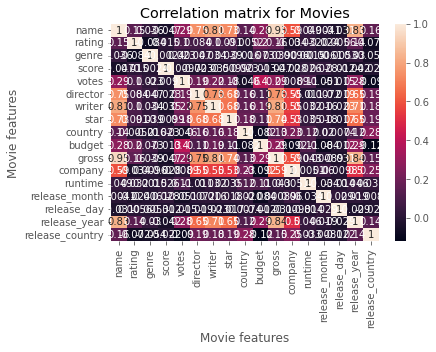

In [113]:
# Using factorize - this assigns a random numeric value for each unique categorical value

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [114]:
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star             company            0.527116
company          star               0.527116
                 writer             0.546151
writer           company            0.546151
company          director           0.552258
director         company            0.552258
company          gross              0.588156
gross            company            0.588156
name             company            0.591667
company          name               0.591667
star             release_year       0.645981
release_year     star               0.645981
                 director           0.646760
director         release_year       0.646760
star             writer             0.675685
writer           star               0.675685
director         star               0.682385
star             director           0.682385
writer           release_year       0.714607
release_year     writer             0.714607
name             star               0.731565
star             name               0.731565
          